# Online Movie Rental Analysis

## Libraries

In [1]:
# List of Modules used in this Notebook
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from pandasql import sqldf

## Problem Identification

On this occasion, I work as a Data Analyst for an Online Movie Rental Platform in Indonesia. Currently, they're discussing their next year business plan, deciding on which movies will be served on their online platform. On their planning stage, they need data to help them make decision to make sure they gain as much profit as possible. 

## Problem Statement:
The main goal on this project is to create decision on which kind of movies would be provided in their online platform. In this project, we're targeting to gain IDR 100 million revenue on the next year course. The data needed would be both the movies' commercial and critical success, gained from it's revenue and IMDB Score respectively. We will also analyze the Release Year of the movies, since classics are gaining popularity recently. By providing favorable movies for the customers, our revenue target will be possible to achieve.

## Key Analytical Questions
- Is there a correlation between IMDB scores and movie revenue?
- Which Genre are most preferred by consumer?
- Who are the key players in audience preference?
- Where are the audience's favorite films coming from?
- When were the most successful or beloved films released?
- What’s the development roadmap for the coming year?

# Data Loading
Data for this analysis was fetched from 'https://www.kaggle.com/datasets/danielgrijalvas/movies'<br>
This data contains metadata of the film, including rating, genre, release date, IMDB score, budget, gross, country, company, and runtime.  
This data has 7.668 rows and 15 columns.

Here's the first preview of the data:

In [2]:
# loading the data ('movies.csv')
df = pd.read_csv('movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


As we can see on the table above, this data was made of 7.668 rows dan 15 columns. According to Kaggle, this dataset contains 3% missing values on rating, country and gross, I will make sure of it by checking the missing values later. For this analysis, we will only use 7 Column: name, genre, year, score (IMDB), country, gross, and company. On the next step, we will clean the data to make it more suitable for our analysis.

# Data Cleaning

As mentioned before, we will filter the data to only 7 columns that we need.

In [3]:
# making a new table with relevant columns
movies = df[['name','genre','year','score','country','company','gross']]
movies

,name,genre,year,score,country,company,gross
0,The Shining,Drama,1980,8.4,United Kingdom,Warner Bros.,46998772.0
1,The Blue Lagoon,Adventure,1980,5.8,United States,Columbia Pictures,58853106.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,United States,Lucasfilm,538375067.0
3,Airplane!,Comedy,1980,7.7,United States,Paramount Pictures,83453539.0
4,Caddyshack,Comedy,1980,7.3,United States,Orion Pictures,39846344.0
...,...,...,...,...,...,...,...
7663,More to Life,Drama,2020,3.1,United States,NaN,NaN
7664,Dream Round,Comedy,2020,4.7,United States,Cactus Blue Entertainment,NaN
7665,Saving Mbango,Drama,2020,5.7,United States,Embi Productions,NaN
7666,It's Just Us,Drama,2020,NaN,United States,NaN,NaN


In [4]:
# Checking Data Information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     7668 non-null   object 
 1   genre    7668 non-null   object 
 2   year     7668 non-null   int64  
 3   score    7665 non-null   float64
 4   country  7665 non-null   object 
 5   company  7651 non-null   object 
 6   gross    7479 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 419.5+ KB


Next, we will check how many missing values and how many duplicates are there in this dataset. To make sure we can analyze the data properly, it's better to have no missing values nor data duplicates

In [5]:
# Checking Missing Values and Duplicates
misval = movies.isnull().sum().sum()
dupval = movies.duplicated().sum()
miss_in_column = movies.isnull().sum()
print(f'There are {misval} missing values and {dupval} duplicates in this dataset')
print(f'Missing values in each column: {miss_in_column}')


There are 212 missing values and 0 duplicates in this dataset
Missing values in each column: name         0
genre        0
year         0
score        3
country      3
company     17
gross      189
dtype: int64


As we can see from the result above, this dataset has no duplicated row, which is good, but we have 212 missing values, dominated by gross missing values. Since the missing values amount is so small (2,7%) I decide to drop it.

In [6]:
# Menghapus missing value
movies = movies.dropna()
movies

,name,genre,year,score,country,company,gross
0,The Shining,Drama,1980,8.4,United Kingdom,Warner Bros.,46998772.0
1,The Blue Lagoon,Adventure,1980,5.8,United States,Columbia Pictures,58853106.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,United States,Lucasfilm,538375067.0
3,Airplane!,Comedy,1980,7.7,United States,Paramount Pictures,83453539.0
4,Caddyshack,Comedy,1980,7.3,United States,Orion Pictures,39846344.0
...,...,...,...,...,...,...,...
7652,The Eight Hundred,Action,2020,6.8,China,Beijing Diqi Yinxiang Entertainment,461421559.0
7653,The Quarry,Crime,2020,5.4,United States,Prowess Pictures,3661.0
7655,Legend of Deification,Animation,2020,6.6,China,Beijing Enlight Pictures,240663149.0
7656,Tulsa,Comedy,2020,5.0,United States,Pryor Entertainment,413378.0


We've dropped rows with missing values. And since we've checked that we have no duplicated rows, we'll continue the analysis process and save this clean dataset so we can load it in Tableau Dashboard.

In [7]:
# save to csv
movies.to_csv('movies_cleaned.csv')

# Data Analysis
## 1. Correlation between IMDB Score and Movie Revenue
In this section, we will analyze wether IMDB Score has contribution to commercial succes. If we can find correlation between the two, we can also use IMDB score as a proxy to predict the revenue. This will also help us understand what kind of movies we should provide to customer for better profit. Before analyzing the correlation, it's better to check each data separately.

### 1.1 IMDB Score
IMDB Score is written as `score` and is a metrics of scoring given by cinephiles in the website of [International Movie Database](IMDB.com). Since this scoring system was made by the reviews of consumer, we can also say that this score could indicate how well is the movie received by the consumer. Here's a data analysis of the IMBD Score

In [8]:
# Analisis Central Tendency Data Score IMDB
print(f'Mean of IMDB Score: {movies.score.mean():.2f}')
print(f'Median of IMDB Score: {movies.score.median():.2f}')
print(f'Mode of IMDB Score: {movies.score.mode().iat[0]}')
print(f'Standard deviation of IMDB Score: {movies.score.std():.2f}')
print(f'Skewness of IMDB Score: {movies.score.skew():.2f}')
print(f'Kurtosis of IMDB Score: {movies.score.kurtosis():.2f}')

Mean of IMDB Score: 6.40
Median of IMDB Score: 6.50
Mode of IMDB Score: 6.6
Standard deviation of IMDB Score: 0.96
Skewness of IMDB Score: -0.61
Kurtosis of IMDB Score: 0.95


If we look at the central tendencies, they look close to each other, I'd assume they're normally distributed. But if we look at the skewness value, But if we look at the skewness value, then we'll know that this column is negatively skewed.  From the Kurtosis value, we can say that this is close to normal distribution, but tends to peaked distribution. To better picture this, we can see the graph below.

<Axes: ylabel='Frequency'>

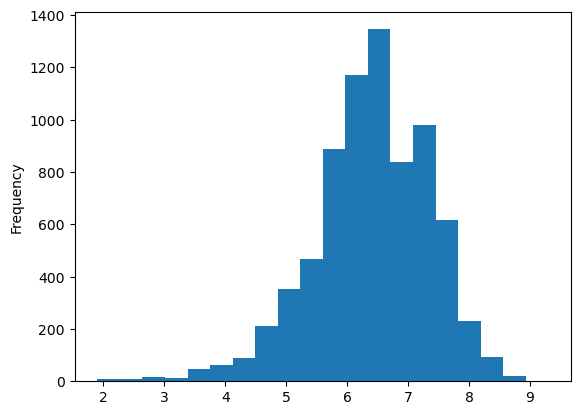

In [9]:
# Untuk menampilkan Chart score
movies.score.plot(kind='hist',bins=20)

### 1.2 Gross (revenues)

After analyzing `score`, we're now analyzing `gross` that could help us understand how well the commercial success of the movie is. We will use the same data analysis as the one we used before.

In [10]:
# Analisis Central Tendency Data Gross sales
print(f'Mean 0f Gross : {movies.gross.mean():.2f}')
print(f'Median 0f Gross : {movies.gross.median():.2f}')
print(f'Mode 0f Gross : {movies.gross.mode().iat[0]}')
print(f'Standard Deviation 0f Gross : {movies.gross.std():.2f}')
print(f'Skewness 0f Gross : {movies.gross.skew():.2f}')
print(f'Kurtosis 0f Gross : {movies.gross.kurtosis():.2f}')

Mean 0f Gross : 78610072.00
Median 0f Gross : 20240315.00
Mode 0f Gross : 14000000.0
Standard Deviation 0f Gross : 165822330.69
Skewness 0f Gross : 5.31
Kurtosis 0f Gross : 45.45


Unlike `score`, `gross` is visibly not normally distribution, even from looking at the Central Tendencies that's not close to each other. The Skewness value is 5.31, which means highly skewed. The Kurtosis Value also shows that this data has a high peak and very thin tail. We can see the graph below to better picture the data.

<Axes: ylabel='Frequency'>

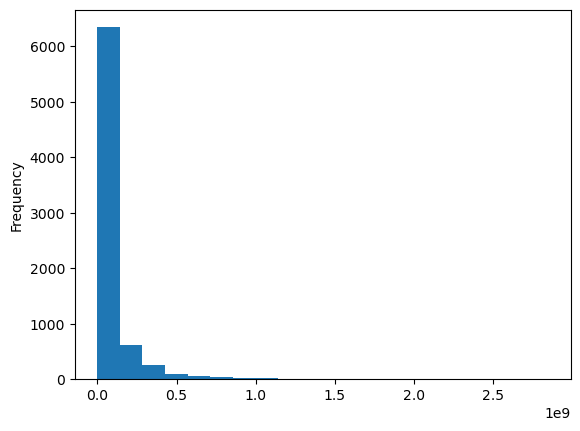

In [11]:
# Untuk menampilkan Chart gross
movies.gross.plot(kind='hist',bins=20)

### Correlation analysis between IMDB Score and gross

To find correlation between the two, it would be easier to create a scatterplot to picture the relation between the `score` and `gross`.

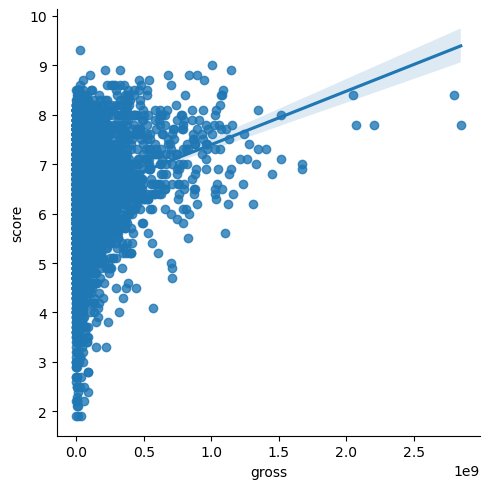

In [12]:
# membuat scatter plot
sns.lmplot(data=movies, x='gross', y="score")

By looking at the graph above, we can see that `score` doesn't always follow the `gross`, though we can still see a tendency of correlation between them in movies with higher `gross`. To gain a more objective point of view, we'll use statistical method to test wether both data has correlation with each other. Since our data is skewed, we'll us Spearman's Correlation Coefficient to test the correlation.

In [13]:
# Correlation Analysis (Spearman)
corr_rho, pval_s = stats.spearmanr(movies['gross'], movies['score'])   

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}") 

rho-correlation: 0.13, p-value: 1.862374704635175e-27


Based on the statistic analysis, `gross` and `score` has a very weak positive correlation, but the p-value shows that they're statistically significant, the correlation is really there and didn't happen due to chance. So we can still say that they're weakly correlated

## 2. Which Genre are most preferred by consumer?


Before we analyze which Genre are most preferred, we have to find out how many genres are there in this dataset and the percentage of each genre  

In [14]:
# List every genre and their value counts
movies['genre'].value_counts()

genre
Comedy       2190
Action       1671
Drama        1463
Crime         542
Biography     432
Adventure     420
Animation     335
Horror        306
Fantasy        43
Mystery        20
Thriller       12
Family         11
Romance         8
Sci-Fi          8
Western         3
Musical         2
Music           1
Sport           1
Name: count, dtype: int64

Untuk menggambarkan persentasenya, akan lebih mudah bila kita buat piechart:

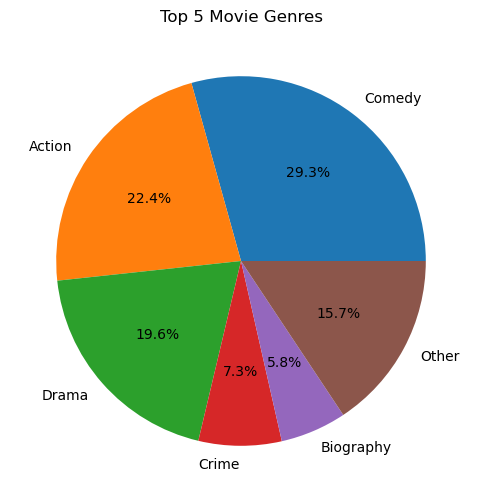

In [15]:
genre_counts = movies['genre'].value_counts()
vgenre = genre_counts.nlargest(5)
other = genre_counts.iloc[5:].sum()
final = pd.concat([vgenre, pd.Series(other, index=['Other'])])

final.plot(kind='pie', autopct='%.1f%%', figsize=(6,6))
plt.title('Top 5 Movie Genres')
plt.ylabel('') 
plt.show()

From this piechart we can see that this dataset is dominated by Comedy with 29.3% of the movies are from that genre, then Action on the 2nd place, Drama with 19,6% on the third, with Crime and Biography wih 7.3% and 5.8% respectively. The other 13 genres are only making 15.7% of the dataset.

In [16]:
# Creating new dataframe with average score for each genre
Genre = movies[['genre','score']].copy()
Genre['AvgScr'] = movies['score'].groupby(movies['genre']).transform('mean')
# score column is not needed anymore
Genre = Genre.drop(columns='score')
# Reset index and sort by average score
Genre =Genre.drop_duplicates().sort_values(by='AvgScr', ascending=False).reset_index(drop=True)
Genre

,genre,AvgScr
0,Musical,8.050000
1,Music,7.200000
2,Biography,7.039120
3,Animation,6.772836
4,Drama,6.701230
5,Crime,6.680996
6,Mystery,6.665000
7,Romance,6.500000
8,Sci-Fi,6.387500
9,Family,6.363636


By the average score, the top 5 genre with the highest Average Score are: Muiscal, Music, Biography, Animation, and Drama.

In [17]:
# Create new table with average gross by genre
Gross_Genre = movies[['genre','gross']].copy()
Gross_Genre['AvgGrs'] = movies['gross'].groupby(df['genre']).transform('mean')
# score column dropping
Gross_Genre = Gross_Genre.drop(columns='gross')
# reset index and sort by average gross
Gross_Genre =Gross_Genre.drop_duplicates().sort_values(by='AvgGrs', ascending=False).reset_index(drop=True)
Gross_Genre

,genre,AvgGrs
0,Animation,2.392300e+08
1,Family,1.961725e+08
2,Action,1.456803e+08
3,Adventure,1.093252e+08
4,Mystery,1.011835e+08
5,Biography,4.797892e+07
6,Horror,4.752706e+07
7,Comedy,4.437010e+07
8,Crime,3.940120e+07
9,Drama,3.904089e+07


However, if we look at the `gross`, **Animation** has the highest average gross compared to other genres, with **Family**, **Action**, **Adventure**, and **Mystery** at the top 5. We can also see that **Musical** and **Music** are both placed lower in the list, this may happen because movies with genres such as **Musical** and **Music** has really segmented consumer, which may help their ratings and be successfull critically, but failed to attract the majority, making their revenues small. 

In [23]:
# Creating Ranking system based on average score and average gross
Genre['Genre_Rank'] = Genre['AvgScr'].rank(method='min', ascending=False)
Gross_Genre['Gross_Rank'] = Gross_Genre['AvgGrs'].rank(method='min', ascending=False)
Ranking = pd.merge(Genre[['genre', 'Genre_Rank']], Gross_Genre[['genre', 'Gross_Rank']], on='genre', how='outer')
Ranking['Overall'] = (18 - Ranking['Genre_Rank']) + (18 - Ranking['Gross_Rank'])
Ranking = Ranking.sort_values(by='Overall', ascending=False).reset_index(drop=True)
Ranking

,genre,Genre_Rank,Gross_Rank,Overall
0,Animation,4.0,1.0,31.0
1,Biography,3.0,6.0,27.0
2,Family,10.0,2.0,24.0
3,Mystery,7.0,5.0,24.0
4,Action,12.0,3.0,21.0
5,Crime,6.0,9.0,21.0
6,Drama,5.0,10.0,21.0
7,Adventure,11.0,4.0,21.0
8,Musical,1.0,16.0,19.0
9,Music,2.0,18.0,16.0


Since `Average Gross` and `Average Score` can't really agreed on which genre is the best, I decided to combine both metrics to create a new ranking based on how well they're on both `gross` and `score`, since I believe both could predict how well movie is received by consumer in general. Based on this list, the Overally best genres are: **Animation**, **Biography**, **Family**, **Mystery**, and **Action**

## 3.  Who are the key players in audience preference?

You've definitely heard of Marvel Studios or Paramount or Lionsgate right? Well I'm sure there are lots of companies we've never heard before, which leaves me wondering, are there any pattern in this? Are there any specific company that when release it'll be an instant blockbuster? Let's analyze the companies!

In [24]:
# Movies count by company
movies['company'].value_counts()

company
Universal Pictures       376
Warner Bros.             333
Columbia Pictures        332
Paramount Pictures       319
Twentieth Century Fox    240
                        ... 
Kanun parvaresh fekri      1
Kuzui Enterprises          1
Q Productions              1
Too Askew Prod. Inc.       1
Pryor Entertainment        1
Name: count, Length: 2275, dtype: int64

On this Dataset, we have 2.275 companies, with Universal Pictures has the most movies released. We can also see that some of these companies only released one movie. Let's see how well each of these companies are. 

In [25]:
# New table with average gross by company
acompany = movies[['company','gross']].copy()
acompany['AvgGrs'] = movies['gross'].groupby(df['company']).transform('mean')
# score column dropping
acompany = acompany.drop(columns='gross')
# reset index and sort by average gross
acompany=acompany.drop_duplicates().sort_values(by='AvgGrs', ascending=False).reset_index(drop=True)
acompany

,company,AvgGrs
0,Marvel Studios,1.255466e+09
1,Illumination Entertainment,1.097122e+09
2,Fairview Entertainment,9.665549e+08
3,B24,8.806815e+08
4,Avi Arad Productions,8.560852e+08
...,...,...
2270,Process Film,2.037000e+03
2271,Cinema Libre Studio,1.808000e+03
2272,Balboa Entertainment,1.605000e+03
2273,Visual Arts Entertainment,7.900000e+02


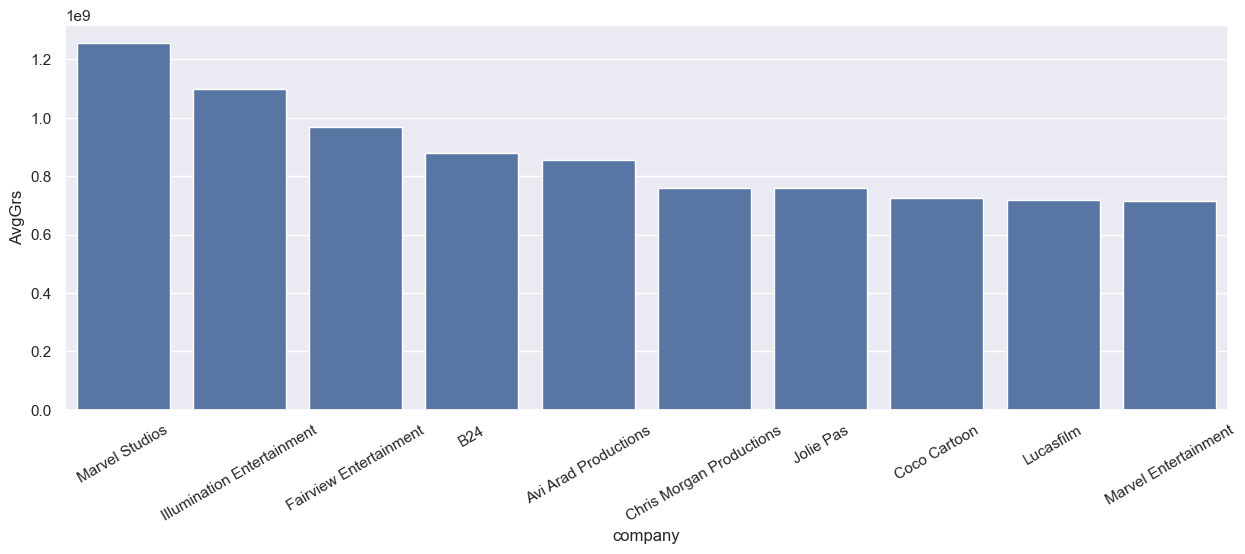

In [ ]:
# Create a graph to visualize the top 10 companies
dispcom=sqldf('''SELECT *
      FROM acompany
      LIMIT 10''')

# Create a scatter plot
sns.barplot(data=dispcom, x='company', y="AvgGrs")
plt.xticks(rotation=30)
sns.set_theme(rc={'figure.figsize':(15,5)})

We can see the top 10 graph above. Since this is ranked by the Average Gross, it's safe to assume that everytime the company release a movie, it reaches that amount of gross. Since we're trying to reach highest profit possible, I'd advise to instantly provide movies from the top 5 of this list: **Marvel Studios**, **Illumination Entertainment**, **Fairview Enternainment**, **B24**, and **Avi Arad Productions**

## 4. Where are the audience's favorite movies coming from?

Our next step would be analyzing the countries in this list. However, if we rank them based on the `gross` then we're being unfair since movies from the Western World is easier to access, so I decided to rank them on Average `score` instead.

In [26]:
# List of countries
movies['country'].value_counts()

country
United States                     5369
United Kingdom                     798
France                             262
Canada                             183
Germany                            116
Australia                           86
Japan                               76
India                               59
Italy                               57
Spain                               44
Ireland                             42
Hong Kong                           40
China                               39
South Korea                         35
Denmark                             31
Sweden                              25
New Zealand                         24
Mexico                              22
Norway                              12
West Germany                        11
Netherlands                         10
Switzerland                         10
Russia                               8
Belgium                              8
Czech Republic                       8
Iran             

Langkah selanjutnya adalah membuat tabel berisi kolom negara dan rata-rata score filmnya

In [29]:
# Create a new table with average score for each country
Country = movies[['country','score']].copy()
Country['AvgScr'] = movies['score'].groupby(df['country']).transform('mean')
# score column dropping
Country = Country.drop(columns='score')
# reset index and sort by average score
Country = Country.drop_duplicates().sort_values(by='AvgScr', ascending=False).reset_index(drop=True)
Country.head(10)

,country,AvgScr
0,Lebanon,8.400000
1,Federal Republic of Yugoslavia,8.100000
2,Republic of Macedonia,8.000000
3,Iran,7.950000
4,Romania,7.900000
5,Turkey,7.866667
6,Argentina,7.816667
7,Indonesia,7.800000
8,Taiwan,7.742857
9,Brazil,7.700000


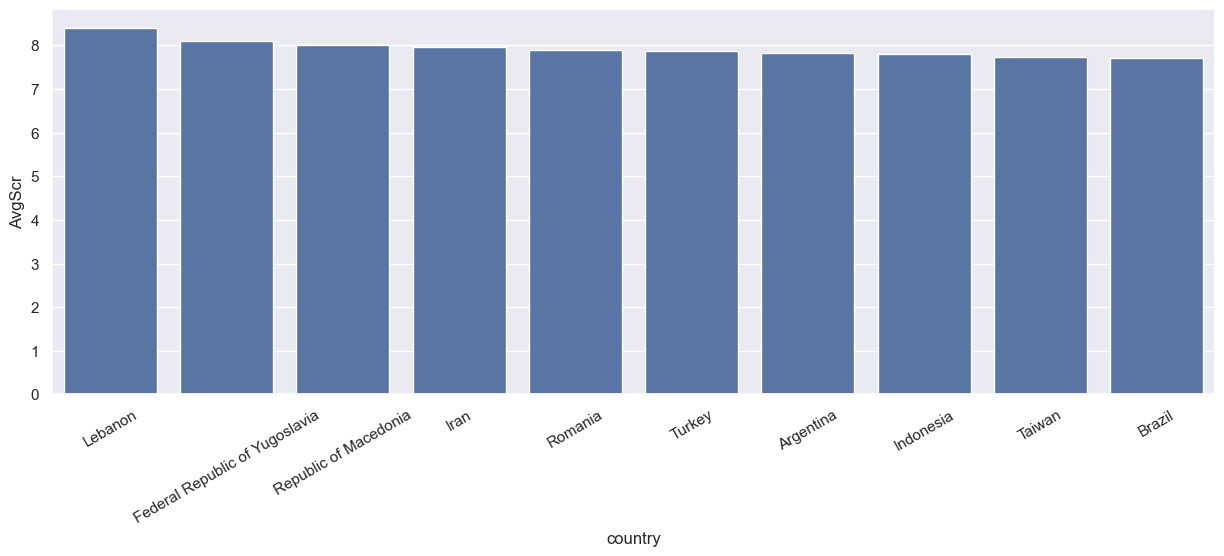

In [ ]:
# Creating Visualization for the top 10 countries
dispneg=sqldf('''SELECT *
      FROM Country
      LIMIT 10''')

# Create a bar plot
sns.barplot(data=dispneg, x='country', y="AvgScr")
plt.xticks(rotation=30)
sns.set_theme(rc={'figure.figsize':(15,5)})

Based on the data we have, top 5 countries with highest average IMDB Score are:
1. Lebanon
2. Federal Republic of Yugoslavia
3. Republic of Macedonia
4. Iran
5. Romania

Even though we need to keep in mind that the Average Score shouldn't be a sole metrics to define success, we can dig some of the movies from the said countries to recommend as a hidden gem for our customer. 

## 5. When were the most successful or beloved films released?
Looking at today's condition, we can see that some of old movies are getting some recognition, even some are considered to be back in the pop culture. Movies like *The Godfather*, *Back to the Future*, *Fight Club*, and many more get some hype even in younger audiences. But let's see if it will worth the price to bring back classics

In [31]:
# Create a list of average score for old movies (released before 2000)
oldies = movies[movies['year'] < 2000][['year','score']].groupby('year').mean()
oldies

,score
year,
1980,6.306173
1981,6.350962
1982,6.318487
1983,6.066142
1984,6.194268
1985,6.357627
1986,6.191848
1987,6.252660
1988,6.286387


In [30]:
# Create a list of average score for new movies (released since 2000)
newies = movies[movies['year'] > 1999][['year','score']].groupby('year').mean()
newies

,score
year,
2000,6.352041
2001,6.453000
2002,6.359000
2003,6.332500
2004,6.515000
2005,6.363000
2006,6.463819
2007,6.474000
2008,6.383417


Let's compare the average of Movies IMDB scores, grouped by whether they're new movies or old movies

In [32]:
# Average score for both categories
print(f'Average score for old movies: {oldies['score'].mean():.2f}')
print(f'Average score for new movies: {newies['score'].mean():.2f}')

Average score for old movies: 6.32
Average score for new movies: 6.45


Comparing the Average Score of the old movies and new movies, we can see that the New Movies is higher in average score, which means that newer movies are still more preferred than older movies. But is this statistic really true? Or are there a bias in the data? To prove that we're conducting the T-test with:  

H0: Old Movies and New Movies has no difference in Average Score  
H1: Newer movies have a higher average score than older ones

In [33]:
# T-test
older = movies[movies['year'] < 2000]['score']
newer = movies[movies['year'] > 1999]['score']
t_stat, p_val = stats.ttest_ind(older, newer)
print('T-statistic:', t_stat)
print('P-value:', p_val/2)

T-statistic: -6.3468541940542
P-value: 1.1630345078625423e-10


The negative T-statistic value shows that the older movies has a lower mean of average score compared to the newer movies, and the p-value confirms that this is statistically significant. In summary, it's not worth it to provide customer with old movies since newer movies are more preferable, those titles mentioned before are just great movies happened to be released in the past.

## 6. What’s the development roadmap for the coming year?

After some analysis, we will try to calculate how much profit we can gain if we provide the customers with:
1. Genre : Animation
2. Genre : Biography
3. Company : Marvel Studios

Assuming we can get 0.01% of each movie's gross, we'll calculate how much revenue we can earn by providing customer with 99 titles in the first year.

In [ ]:
# Filtering genre to animation and year after 2000
maxgenre = movies.query('genre == "Animation"')
maxgenre = maxgenre.query('year > 2000')
maxgenre = maxgenre.sort_values(by='gross', ascending=False)
maxgenre.head(10)

,name,genre,year,score,country,company,gross
7480,The Lion King,Animation,2019,6.9,United States,Walt Disney Pictures,1.670728e+09
7494,Frozen II,Animation,2019,6.8,United States,Walt Disney Animation Studios,1.450027e+09
6262,Frozen,Animation,2013,7.4,United States,Walt Disney Animation Studios,1.281508e+09
7281,Incredibles 2,Animation,2018,7.6,United States,Walt Disney Pictures,1.244640e+09
6688,Minions,Animation,2015,6.4,United States,Illumination Entertainment,1.159445e+09
7488,Toy Story 4,Animation,2019,7.7,United States,Pixar Animation Studios,1.073395e+09
5685,Toy Story 3,Animation,2010,8.2,United States,Walt Disney Pictures,1.066971e+09
7140,Despicable Me 3,Animation,2017,6.3,United States,Illumination Entertainment,1.034800e+09
6908,Finding Dory,Animation,2016,7.3,United States,Pixar Animation Studios,1.028571e+09
6863,Zootopia,Animation,2016,8.0,United States,Walt Disney Pictures,1.024121e+09


In [49]:
# filtering genre to biography and year after 2000
sgenre = movies.query('genre == "Biography"')
sgenre = sgenre.query('year > 2000')
sgenre = sgenre.sort_values(by='gross', ascending=False)
sgenre.head(10)

,name,genre,year,score,country,company,gross
7246,Bohemian Rhapsody,Biography,2018,7.9,United Kingdom,Twentieth Century Fox,911902649.0
7050,The Greatest Showman,Biography,2017,7.6,United States,Bona Film Group,438006904.0
5688,The King's Speech,Biography,2010,8.0,United Kingdom,The Weinstein Company,427374317.0
5853,The Intouchables,Biography,2011,8.5,France,Quad Productions,426588510.0
6243,The Wolf of Wall Street,Biography,2013,8.2,United States,Red Granite Pictures,392000694.0
4051,Catch Me If You Can,Biography,2002,8.1,United States,Dreamworks Pictures,352114312.0
7255,Green Book,Biography,2018,8.2,United States,Participant,321752656.0
3856,A Beautiful Mind,Biography,2001,8.2,United States,Universal Pictures,316791257.0
5460,The Blind Side,Biography,2009,7.6,United States,Alcon Entertainment,309208309.0
4859,The Pursuit of Happyness,Biography,2006,8.0,United States,Columbia Pictures,307127625.0


In [51]:
# filtering company to marvel studios and year after 2000
mcompany = movies.query('company == "Marvel Studios"')
mcompany = mcompany.query('year > 2000')
mcompany = mcompany.sort_values(by='gross', ascending=False)
mcompany

,name,genre,year,score,country,company,gross
7445,Avengers: Endgame,Action,2019,8.4,United States,Marvel Studios,2.797501e+09
7244,Avengers: Infinity War,Action,2018,8.4,United States,Marvel Studios,2.048360e+09
6043,The Avengers,Action,2012,8.0,United States,Marvel Studios,1.518816e+09
6644,Avengers: Age of Ultron,Action,2015,7.3,United States,Marvel Studios,1.402810e+09
7247,Black Panther,Action,2018,7.3,United States,Marvel Studios,1.347598e+09
6244,Iron Man 3,Action,2013,7.1,United States,Marvel Studios,1.214811e+09
6846,Captain America: Civil War,Action,2016,7.8,United States,Marvel Studios,1.153337e+09
7049,Guardians of the Galaxy Vol. 2,Action,2017,7.6,United States,Marvel Studios,8.637561e+08
6443,Guardians of the Galaxy,Action,2014,8.0,United States,Marvel Studios,7.733501e+08
6849,Doctor Strange,Action,2016,7.5,United States,Marvel Studios,6.777961e+08


Since **Marvel Studios** only has 12 movies, we'll then have 44 titles from **Animation** and 43 from **Biography** to fill our first 99 titles list.

In [54]:
top_maxgenre = maxgenre.head(44)
top_sgenre = sgenre.head(43)
top_mcompany = mcompany.head(12)

top_combined = pd.concat([top_maxgenre, top_sgenre, top_mcompany], ignore_index=True)
top_combined = top_combined.sort_values(by='gross', ascending=False).reset_index(drop=True)
top_combined

,name,genre,year,score,country,company,gross
0,Avengers: Endgame,Action,2019,8.4,United States,Marvel Studios,2.797501e+09
1,Avengers: Infinity War,Action,2018,8.4,United States,Marvel Studios,2.048360e+09
2,The Lion King,Animation,2019,6.9,United States,Walt Disney Pictures,1.670728e+09
3,The Avengers,Action,2012,8.0,United States,Marvel Studios,1.518816e+09
4,Frozen II,Animation,2019,6.8,United States,Walt Disney Animation Studios,1.450027e+09
...,...,...,...,...,...,...,...
94,Finding Neverland,Biography,2004,7.7,United States,Miramax,1.166506e+08
95,The Iron Lady,Biography,2011,6.4,United Kingdom,DJ Films,1.158907e+08
96,Changeling,Biography,2008,7.7,United States,Imagine Entertainment,1.133982e+08
97,Moneyball,Biography,2011,7.6,United States,Columbia Pictures,1.102062e+08


Assuming we can get 0.01% of `gross`, we can create our rental revenue column by multiplying `gross` with 0.001, we will then drop the gross column to make it simpler.

In [56]:
top_combined['rental_revenue'] = top_combined['gross'] * 0.0001
top_combined = top_combined.drop(columns='gross')
top_combined = top_combined.sort_values(by='rental_revenue', ascending=False).reset_index(drop=True)
top_combined

,name,genre,year,score,country,company,rental_revenue
0,Avengers: Endgame,Action,2019,8.4,United States,Marvel Studios,279750.1328
1,Avengers: Infinity War,Action,2018,8.4,United States,Marvel Studios,204835.9754
2,The Lion King,Animation,2019,6.9,United States,Walt Disney Pictures,167072.7580
3,The Avengers,Action,2012,8.0,United States,Marvel Studios,151881.5515
4,Frozen II,Animation,2019,6.8,United States,Walt Disney Animation Studios,145002.6933
...,...,...,...,...,...,...,...
94,Finding Neverland,Biography,2004,7.7,United States,Miramax,11665.0613
95,The Iron Lady,Biography,2011,6.4,United Kingdom,DJ Films,11589.0699
96,Changeling,Biography,2008,7.7,United States,Imagine Entertainment,11339.8237
97,Moneyball,Biography,2011,7.6,United States,Columbia Pictures,11020.6216


After we have the `rental_revenue`, we calculate the confidence interval

In [59]:
# Calculating Confidence Interval
std = top_combined['rental_revenue'].std()
N = len(top_combined)

low, up = stats.norm.interval(0.95,loc=top_combined['rental_revenue'].mean(), scale = std/np.sqrt(N))

print (f'lowest revenue: {(low/10):.2f}')
print (f'highest revenue: {(up/10):.2f}')

lowest revenue: 5189.76
highest revenue: 7036.65


Based on calculation above, the rental revenue is somewhere between USD 5189.76 and USD 7036.65 or in IDR: 77.846.400 - 105.549.750. Which means that our plan may reach our next year target!

# Conclusion
From our analysis, we recommend to serve movies on the platform based on these criteria:
1. Genre : Animation, Biography, Mystery
2. Company: Marvel Studios, Illumination Enrtainment, Fairview Enterntainment.
3. These countries could be added as hidden gems: Lebanon, Republic of Yugoslavia, Republic of Macedonia
4. Old movies aren't going to be significant, we're not recommending to serve them to customers.
5. After doing Confidence Level Analysis, we've found that just by serving 99 titles from Genre Animation & Biography, and Movies from Marvel Studios, we can gain IDR 77.846.400 - 105.549.750, which means our next year target is achievable